# Further Hypothesis Testing

## Assignment: ice cream

This assignment contains exercises to test your understanding of various hypothesis tests from the course. It is a good idea to revise the course material thoroughly before starting.

Use whatever computational resources you like to answer the questions (e.g. python, R, any other programming language, a spreadsheet, a calculator, ...).

### The data

The file `Ice_cream.csv` contains data collected on 165 high school students. These are:

* Subject ID
* Wears glasses (0=No, 1=Yes)
* Favourite ice cream flavour (1=Vanilla, 2=Chocolate, 3=Strawberry)
* Score on a video game
* Score on a puzzle


In [1]:
# Library imports:

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt


In [2]:
# Loading the data:

data = pd.read_csv('../Ice_cream.csv')
data


,id,glasses,ice_cream,video,puzzle
0,70,1,2,47,57
1,86,1,3,58,31
2,141,1,3,53,56
3,172,1,1,53,61
4,113,1,1,63,61
...,...,...,...,...,...
160,31,0,1,42,56
161,145,0,1,36,46
162,187,0,1,55,52
163,118,0,1,58,61


### The tasks

In [3]:
# We will use a significance level alpha=0.05 throughout.


Answer the following questions:

1. Are the video game and puzzle scores normally distributed?

In [4]:
# We can use a Shapiro-Wilk test on each set of scores:

# H0: The scores are normally distributed.
# H1: The scores are not normally distributed.

0.07658827304840088

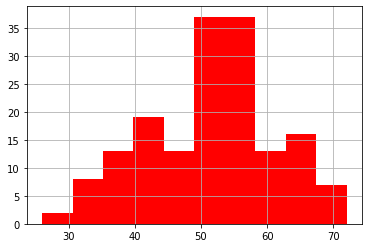

In [5]:
# For the video game:

data.video.hist(color='red')
p_value = stats.shapiro(data.video)[1]
p_value

0.000320218998240307

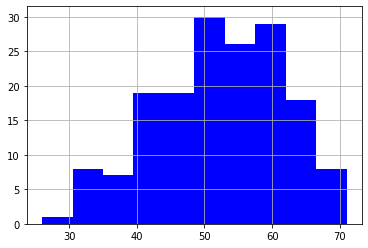

In [6]:
# For the puzzle:

data.puzzle.hist(color='blue', bins=10)
p_value = stats.shapiro(data.puzzle)[1]
p_value

In [7]:
# The video game scores are not significantly divergent from normal (p > alpha),
# but the puzzle scores are (p < alpha).

# (A Bonferroni correction for multiple testing does not change these conclusions.)

2. Is the video game as hard as the puzzle?

In [8]:
# Because the same students generate both scores, the samples are not independent.

# Although the puzzle scores are not normally distributed, we *do* have a big 
# enough sample size (n > 75) to use a paired sample t-test to investigate the 
# mean of the score differences (puzzle - video).

# We will consider this to be two-tailed test:

# H0: mean(puzzle - video) = 0
# H1: mean(puzzle - video) != 0

p_2tailed = stats.ttest_rel(data.puzzle, data.video).pvalue
p_2tailed


0.20001110509253145

In [9]:
# Here, p > alpha so we accept the null hypothesis that the video game is 
# of the same difficulty as the puzzle.

3. Is wearing glasses associated with a lower score on the puzzle game?

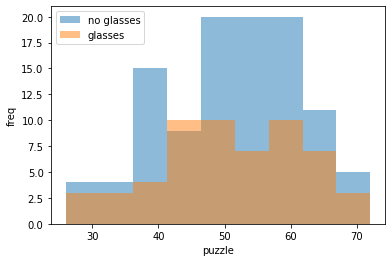

no glasses: n = 108 , mean(puzzle) = 52.842592592592595
glasses: n = 57 , mean(puzzle) = 52.56140350877193


In [10]:
# Let's plot the scores for the two groups:

puzzle_glasses = data.puzzle[data.glasses==1]
puzzle_no_glasses = data.puzzle[data.glasses==0]

xlab = 'puzzle'
ylab = 'freq'

bins = np.linspace(data.puzzle.min(), data.puzzle.max()+1, 10)
ax = plt.axes()
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)

#plt.hist(data.puzzle, bins, alpha=0.5)
plt.hist(puzzle_no_glasses, bins, alpha=0.5, label='no glasses', color='C0' )
plt.hist(puzzle_glasses, bins, alpha=0.5, label='glasses', color='C1' )

ax.legend(loc='upper left')
plt.show()

print('no glasses: n =', len(puzzle_no_glasses), 
      ', mean(puzzle) =', puzzle_no_glasses.mean())
print('glasses: n =', len(puzzle_glasses),
     ', mean(puzzle) =', puzzle_glasses.mean())

In [11]:
# The "glasses" group is just below the sample size that would allow a reliable
# p-value to be obtained from a t-test using non-normal data (n>75).

# Instead, we will use a non-parametric alternative. The two samples are
# independent, so we can use a Mann-Whitney U-test to compare their distributions.

# Note that the question as posed is a one-tailed hypothesis test:

# H0: a random sample from puzzle_glasses is on average the same as 
#     a random sample from puzzle_no_glasses.
# H1: a random sample from puzzle_glasses is on average less than 
#     a random sample from puzzle_no_glasses

p_1tailed = stats.mannwhitneyu(puzzle_glasses, 
                               puzzle_no_glasses, 
                               alternative='less').pvalue

p_1tailed

0.4409296300462722

In [12]:
# The result is p > alpha, so we conclude that glasses wearers do not score
# significantly lower on the puzzle than non-wearers.

4. Do glasses wearers have different ice cream preferences to non-wearers?

In [13]:
# To test whether two categorical variables are independent, we use a 
# chi-squared test:

# H0: glasses and ice_cream are independent.
# H1: glasses and ice_cream are not independent.

# The contingency table:

obs = pd.crosstab(data.glasses, data.ice_cream)
obs

ice_cream,1,2,3
glasses,,,
0,47,32,29
1,31,8,18


In [14]:
# The expected frequencies:

stats.contingency.expected_freq(obs)

array([[51.05454545, 26.18181818, 30.76363636],
       [26.94545455, 13.81818182, 16.23636364]])

In [15]:
# All expected frequencies are above 5, so we are OK to proceed with the test:

stats.chi2_contingency(obs)[1]

0.0834314371780616

In [16]:
# p > alpha, so we accept the null hypothesis that the variables are independent.

5. Is the video game score independent of favourite ice cream?

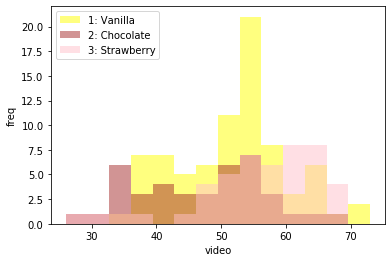

1: Vanilla: n = 78 , mean(video) = 51.794871794871796
2: Chocolate: n = 40 , mean(video) = 46.65
3: Strawberry: n = 47 , mean(video) = 55.851063829787236


In [17]:
# Again, let's plot the scores for the relevant groups:

video_1 = data.video[data.ice_cream==1]
video_2 = data.video[data.ice_cream==2]
video_3 = data.video[data.ice_cream==3]

xlab = 'video'
ylab = 'freq'

bins = np.linspace(data.video.min(), data.video.max()+1, 15)
ax = plt.axes()
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)

plt.hist(video_1, bins, alpha=0.5, label='1: Vanilla', color='yellow' )
plt.hist(video_2, bins, alpha=0.5, label='2: Chocolate', color='brown' )
plt.hist(video_3, bins, alpha=0.5, label='3: Strawberry', color='pink' )

ax.legend(loc='upper left')
plt.show()

print('1: Vanilla: n =', len(video_1), 
      ', mean(video) =', video_1.mean())
print('2: Chocolate: n =', len(video_2), 
      ', mean(video) =', video_2.mean())
print('3: Strawberry: n =', len(video_3), 
      ', mean(video) =', video_3.mean())


In [18]:
# This question asks us to test whether the mean video game scores for the three
# ice cream groups are the same. This requires a one-way ANOVA test:

# H0: The means of the three groups are the same.
# H1: The means of the three groups are not the same.

p_value = stats.f_oneway(video_1, video_2, video_3).pvalue
p_value

2.9627727657836244e-05

In [19]:
# The result is p < alpha, so we reject the null hypothesis and conclude
# that there is a significant association between favourite ice cream and 
# video game score.

---